In [93]:
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
x_test = pd.read_csv('test.csv')
x_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

check for missing data

In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# deal with missing data

In [6]:
data = [train_df, x_test]

In [7]:
for ds in data:
  ds['Age'] = ds['Age'].fillna(ds['Age'].mean())
  ds['Fare'] = ds['Fare'].fillna(ds['Fare'].mean())
  ds['Cabin'] = ds['Cabin'].fillna('H')
  ds['Embarked'] = ds['Embarked'].fillna('S')

#sex

In [9]:

for ds in data:
  ds['is_male'] = (ds['Sex'] == 'male').astype(int)

train_df = train_df.drop('Sex', axis=1)
x_test = x_test.drop('Sex', axis=1)

# drop ticket from datasets


In [10]:
train_df = train_df.drop('Ticket', axis=1)
x_test = x_test.drop('Ticket', axis=1)

# Name

In [12]:
train_df = train_df.drop('Name', axis=1)
x_test = x_test.drop('Name', axis=1)

# Fare

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


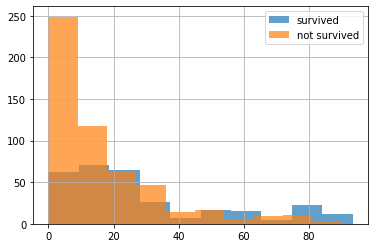

In [13]:
train_df[train_df['Survived'] == 1][train_df['Fare'] < 100]['Fare'].hist(alpha=0.7)
train_df[train_df['Survived'] == 0][train_df['Fare'] < 100]['Fare'].hist(alpha=0.7)
plt.legend(['survived', 'not survived'])
plt.show()

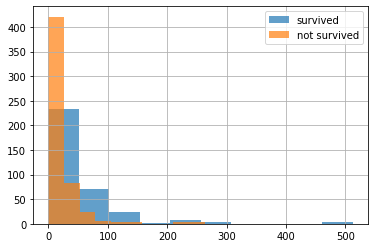

In [14]:
train_df[train_df['Survived'] == 1]['Fare'].hist(alpha=0.7)
train_df[train_df['Survived'] == 0]['Fare'].hist(alpha=0.7)
plt.legend(['survived', 'not survived'])
plt.show()

In [15]:
pd.qcut(train_df['Fare'], q=5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] <
                                    (21.679, 39.688] < (39.688, 512.329]]

In [22]:
for ds in [train_df, x_test]:
  ds['Fare'] = ds['Fare'].astype(int)
  ds.loc[ds['Fare'] <= 7.854, 'Fare'] = 0
  ds.loc[(ds['Fare'] > 7.854) & (ds['Fare'] <= 10.5), 'Fare' ] =1 
  ds.loc[(ds['Fare'] > 10.5) & (ds['Fare'] <= 21.679), 'Fare' ] =2 
  ds.loc[(ds['Fare'] > 21.678) & (ds['Fare'] <= 39.688), 'Fare' ] =3 
  ds.loc[(ds['Fare'] > 39.688) & (ds['Fare'] <= 250), 'Fare' ] =4
  ds.loc[ds['Fare'] >= 250, 'Fare'] = 5
  

In [23]:
train_df['Fare'].value_counts()

0    241
3    180
2    171
4    167
1    123
5      9
Name: Fare, dtype: int64

# Age

In [29]:
pd.qcut(train_df['Age'], q=6)

0        (19.0, 25.0]
1        (31.0, 40.5]
2      (25.0, 29.699]
3        (31.0, 40.5]
4        (31.0, 40.5]
            ...      
886    (25.0, 29.699]
887     (0.419, 19.0]
888    (25.0, 29.699]
889    (25.0, 29.699]
890      (31.0, 40.5]
Name: Age, Length: 891, dtype: category
Categories (6, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 29.699] < (29.699, 31.0] <
                                    (31.0, 40.5] < (40.5, 80.0]]

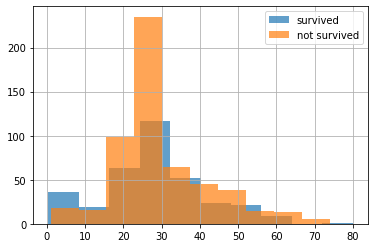

In [30]:
train_df[train_df['Survived'] == 1]['Age'].hist(alpha=0.7)
train_df[train_df['Survived'] == 0]['Age'].hist(alpha=0.7)
plt.legend(['survived', 'not survived'])
plt.show()

In [31]:
for ds in [train_df, x_test]:
  ds['Age'] = ds['Age'].astype(int)
  ds.loc[ds['Age'] <= 10, 'Age'] = 0
  ds.loc[(ds['Age'] > 10) & (ds['Age']<= 19), 'Age'] = 1
  ds.loc[(ds['Age'] > 19) & (ds['Age']<= 25), 'Age'] = 2
  ds.loc[(ds['Age'] > 25) & (ds['Age']<= 29.699), 'Age'] = 3
  ds.loc[(ds['Age'] > 29.699) & (ds['Age']<= 40.5), 'Age'] = 4
  ds.loc[(ds['Age'] > 40.5) & (ds['Age']<= 52), 'Age'] = 5
  ds.loc[(ds['Age'] > 52) & (ds['Age']<= 65), 'Age'] = 6
  ds.loc[ds['Age'] > 65, 'Age'] = 7 

In [32]:
train_df['Age'].value_counts()

3    260
4    182
2    137
1    100
5     97
0     64
6     43
7      8
Name: Age, dtype: int64

# Cabin

In [56]:
for ds in [train_df, x_test]:
  ds['Cabin'] = ds['Cabin'].map(lambda x: x[0])

In [57]:
train_df['Cabin'].value_counts()

H    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Age          891 non-null    int64 
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Cabin        891 non-null    object
 8   Embarked     891 non-null    object
 9   is_male      891 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 69.7+ KB


In [102]:
dataset = []
for ds in [train_df, x_test]:
  ds = pd.get_dummies(ds)
  ds = ds.drop('Cabin_H', axis=1)
  ds = ds.drop('Embarked_C', axis=1)
  ds = ds.drop('PassengerId', axis=1)
  dataset.append(ds)
dataset[0] = dataset[0].drop('Cabin_T', axis=1)

In [103]:
dataset[0].head()

,Survived,Pclass,Age,SibSp,Parch,Fare,is_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_Q,Embarked_S
0,0,3,2,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,4,1,0,4,0,0,0,1,0,0,0,0,0,0
2,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,4,1,0,4,0,0,0,1,0,0,0,0,0,1
4,0,3,4,0,0,1,1,0,0,0,0,0,0,0,0,1


Test 

In [104]:
x_train = dataset[0].drop('Survived', axis=1)
y_train = dataset[0]['Survived']

In [105]:

params = {'knn__n_neighbors': np.arange(5,25)}
step = [('knn', KNeighborsClassifier())]
pipe = Pipeline(step)
cv = GridSearchCV(pipe, param_grid=params)
cv.fit(x_train, y_train)
cv.best_params_

{'knn__n_neighbors': 17}

In [113]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)
y_pred = knn.predict(dataset[1])
y_pred = pd.Series(y_pred) 
y_pred.value_counts()

0    274
1    144
dtype: int64

In [120]:
passengerid = pd.Series(np.arange(892, 1310))
passengerid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Length: 418, dtype: int64

In [126]:
final = pd.concat([passengerid, y_pred], axis=1)
final = final.rename(columns = {0:'PassengerID', 1:'Survived'})
final.to_csv('predict.csv', index=False)

In [116]:
x_test['PassengerId'].max()

1309